In [1]:
#Load in the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
rs = np.random.RandomState(42)
import warnings
warnings.filterwarnings('ignore')


In [2]:
#load in the data and view the head
df = pd.read_csv('data.csv')
df.head()

,Date,Values
0,3/1/2014,45.868
1,3/2/2014,47.606
2,3/3/2014,42.580
3,3/4/2014,46.030
4,3/5/2014,44.992


In [3]:
#Explore the data types
df.dtypes

Date       object
Values    float64
dtype: object

In [4]:
#Changing the data types
df['Date'] =pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Values           float64
dtype: object

In [5]:
#set the index to the date
df = df.set_index('Date')

In [6]:
df

,Values
Date,
2014-03-01,45.868
2014-03-02,47.606
2014-03-03,42.580
2014-03-04,46.030
2014-03-05,44.992
...,...
2018-12-28,44.178
2018-12-29,43.526
2018-12-30,43.944


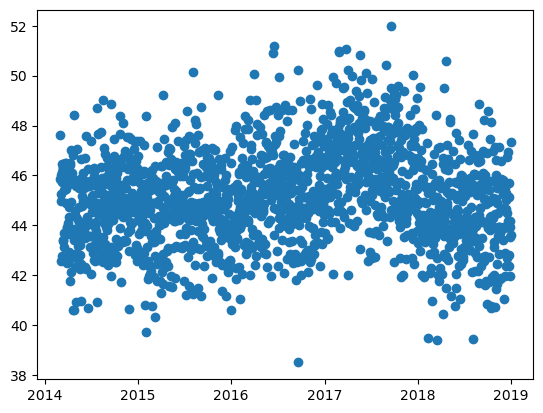

In [7]:
#visualize the data
plt.scatter(x=df.index,y=df['Values'])


In [8]:
#summary statistics
df.describe()

,Values
count,1768.000000
mean,45.123334
std,1.879119
min,38.498000
25%,43.882500
50%,45.000000
75%,46.341500
max,51.972000


In [9]:
# get the upper bound quartile and lower bound quartiles
upperbound = df.quantile(.95)
lowerbound = df.quantile(.5)
high_outliers = pd.DataFrame(np.random.randint(upperbound,upperbound*1.5,size=(100,1)))
low_outliers = pd.DataFrame(np.random.randint(lowerbound*0.5,lowerbound,size=(100,1)))
high_outliers

,0
0,53
1,70
2,68
3,51
4,66
...,...
95,56
96,52
97,52
98,49


In [10]:
#create the model and fit the data
model = IsolationForest()
model.fit(df)
predictions = model.predict(df)
df['predictions'] =predictions

In [11]:
#how many outliers were found
df['predictions'].value_counts()

 1    1355
-1     413
Name: predictions, dtype: int64

In [13]:
# test outlier effectiveness
model.fit_predict(high_outliers)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,
       -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1])

In [14]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(model, 'model.pkl') 

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\sachi\anaconda3\lib\site-packages\sklearn\externals\__init__.py)